In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotifys-long-hits-2014-2024/spotify_long_tracks_2014_2024.csv


In [2]:
data = pd.read_csv("C:/Users/vanip/Downloads/spotify_long_tracks_2014_2024.csv")

In [3]:
null_data = data.isnull()
print(null_data)

        ID   Name  Duration (Minutes)  Artists
0    False  False               False    False
1    False  False               False    False
2    False  False               False    False
3    False  False               False    False
4    False  False               False    False
..     ...    ...                 ...      ...
811  False  False               False    False
812  False  False               False    False
813  False  False               False    False
814  False  False               False    False
815  False  False               False    False

[816 rows x 4 columns]


In [4]:
data.head()

,ID,Name,Duration (Minutes),Artists
0,026O2YP2wRl9h3Ht9ClZST,Steady Rain in a Forest with Light Background ...,100,Nature Sounds
1,0DXnjJxJBvgMvBjG6Jug7I,Soundarya Lahari,66,Mambalam Sisters
2,6BFn78qFy9bRqKHTMfhnNv,Waves of Abundance & Fullfillment,60,Zen Life Relax
3,1dNwMOMtq3yflXibbqgLku,Mosquito Solution Anti Teen Street Party or Te...,45,Device Sound Effect
4,290gfei8moWWSh8qTVkTT3,Ibiza Sunset Tibetan Singing Bowl Sessions 7 (...,44,Tibetan Singing Bowls


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


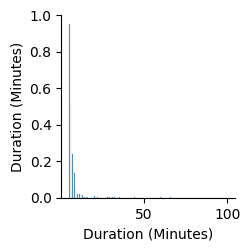

In [5]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)


sns.pairplot(data)
plt.show()

In [6]:
raw=data["Artists"]
#isolating the solo

allArtists=[]
solo=[]
mostColab=[]
typeOfArtist=[]
numOfComma=0
for i in raw:
    if "," in i:
        multiple=i.split(",")
        allArtists.extend(multiple)
        mostColab.extend(multiple)
        numOfComma=i.count(",")+1
        typeOfArtist.append(str(numOfComma)+"Colab")
    else:
        allArtists.append(i)
        solo.append(i)
        typeOfArtist.append("Solo")
#print(typeOfArtist)
data["Type of Collabaration"]=typeOfArtist

In [7]:
#matching_rows = data[data['Type of Collabaration'] == "2Colab"]
#print(matching_rows)

In [8]:
data.head()

,ID,Name,Duration (Minutes),Artists,Type of Collabaration
0,026O2YP2wRl9h3Ht9ClZST,Steady Rain in a Forest with Light Background ...,100,Nature Sounds,Solo
1,0DXnjJxJBvgMvBjG6Jug7I,Soundarya Lahari,66,Mambalam Sisters,Solo
2,6BFn78qFy9bRqKHTMfhnNv,Waves of Abundance & Fullfillment,60,Zen Life Relax,Solo
3,1dNwMOMtq3yflXibbqgLku,Mosquito Solution Anti Teen Street Party or Te...,45,Device Sound Effect,Solo
4,290gfei8moWWSh8qTVkTT3,Ibiza Sunset Tibetan Singing Bowl Sessions 7 (...,44,Tibetan Singing Bowls,Solo


**The below Plot describes the number of songs by each type of collaborations. "Solo" songs top the list with close to 600 songs. **

<Axes: xlabel='Type of Collabaration', ylabel='count'>

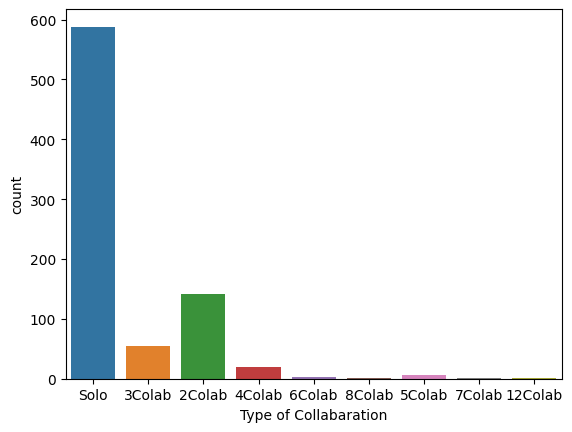

In [9]:
sns.countplot(x="Type of Collabaration",data=data)

**The Avg or mean of the length of song with three artist colaborating is the highest.**

<Axes: xlabel='Type of Collabaration', ylabel='Duration (Minutes)'>

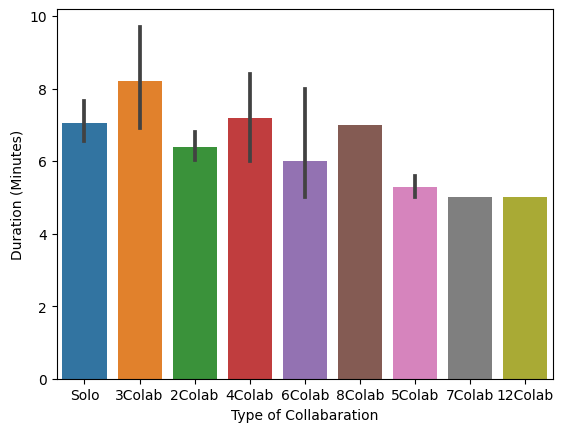

In [10]:
sns.barplot(y="Duration (Minutes)",x="Type of Collabaration",data=data,estimator=np.mean)

<Axes: xlabel='Type of Collabaration', ylabel='Duration (Minutes)'>

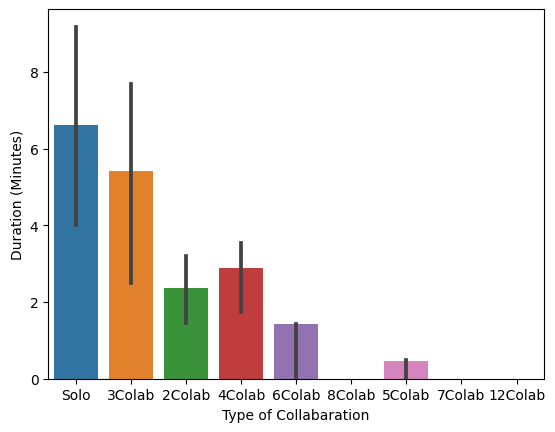

In [11]:
sns.barplot(y="Duration (Minutes)",x="Type of Collabaration",data=data,estimator=np.std)

In [12]:
print(len(allArtists))
print(len(set(allArtists)))

1192
1169
